<a href="https://colab.research.google.com/github/Hiranyabandi/Basketball_March_Madness/blob/main/Basketball_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Basketball Analytics**
1.   Analyze top 4 teams - Florida, Duke,Houston, Auburn.
2.   Add analysis of kentucky vs illinios matchup.

###**Step 1: Load & Filter 2025 March Madness Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv("/content/DEV _ March Madness.csv")
df.head()

,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Correct Team Name?,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2015,SEC,62.4,274,63.8,242,121.3,6,115.5,9,...,Mark Pope,Kentucky Wildcats,202425.0,0 years,1.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
1,2021,WCC,73.8,7,74.3,14,126.4,1,121.9,1,...,Mark Few,Gonzaga Bulldogs,199900.0,25 years,26.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
2,2024,BE,64.6,330,66.0,305,127.5,1,123.0,1,...,Dan Hurley,UConn Huskies,201819.0,6 years,7.0,1,East,UConn,March Madness,1
3,2025,SEC,67.8,143,68.6,164,130.4,1,123.0,1,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
4,2025,ACC,65.3,268,66.4,276,124.0,5,121.2,3,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Columns: 147 entries, Season to Post-Season Tournament Sorting Index
dtypes: float64(97), int64(40), object(10)
memory usage: 9.3+ MB


In [4]:
df.isnull().sum()

,0
Season,0
Short Conference Name,0
Adjusted Temo,0
Adjusted Tempo Rank,0
Raw Tempo,0
...,...
Seed,0
Region,0
Correct Team Name?,8194
Post-Season Tournament,0


In [5]:
df_2025 = df[df["Season"] == 2025].copy()

# Filter for target teams
teams_of_interest = [
    "Florida Gators", "Auburn Tigers", "Duke Blue Devils",
    "Houston Cougars", "Kentucky Wildcats", "Illinois Fighting Illini"
]
df_teams = df_2025[df_2025["Full Team Name"].isin(teams_of_interest)].reset_index(drop=True)
df_teams.head()


,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Correct Team Name?,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2025,SEC,67.8,143,68.6,164,130.4,1,123.0,1,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
1,2025,ACC,65.3,268,66.4,276,124.0,5,121.2,3,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
2,2025,B12,61.1,360,62.6,360,123.1,8,118.5,11,...,Kelvin Sampson,Houston Cougars,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
3,2025,SEC,68.9,88,70.4,74,123.5,6,118.0,13,...,Todd Golden,Florida Gators,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
4,2025,B10,72.4,8,73.7,9,118.6,21,114.4,40,...,Brad Underwood,Illinois Fighting Illini,201718.0,7 years,8.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5


In [6]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 147 entries, Season to Post-Season Tournament Sorting Index
dtypes: float64(97), int64(40), object(10)
memory usage: 7.0+ KB


In [7]:
missing_info = df_teams.isnull().sum()
missing_percent = (df_teams.isnull().mean() * 100).round(2)

print("\n🔍 Missing Values Overview:")
print(pd.concat([missing_info, missing_percent], axis=1, keys=["Missing Count", "Missing %"]))


🔍 Missing Values Overview:
                                      Missing Count  Missing %
Season                                            0        0.0
Short Conference Name                             0        0.0
Adjusted Temo                                     0        0.0
Adjusted Tempo Rank                               0        0.0
Raw Tempo                                         0        0.0
...                                             ...        ...
Seed                                              0        0.0
Region                                            0        0.0
Correct Team Name?                                6      100.0
Post-Season Tournament                            0        0.0
Post-Season Tournament Sorting Index              0        0.0

[147 rows x 2 columns]


In [8]:
# Drop column if all values are missing
if df_teams["Correct Team Name?"].isnull().all():
    df_teams.drop(columns=["Correct Team Name?"], inplace=True)
    print("Dropped 'Correct Team Name?' column — all values were missing.")

Dropped 'Correct Team Name?' column — all values were missing.


###**Step 2: Dataset Exploration & Statistical Profiling**

In [9]:
df_teams.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Season,6.0,2025.00,0.00,2025.0,2025.00,2025.00,2025.00,2025.0
Adjusted Temo,6.0,67.67,4.02,61.1,65.92,68.35,70.10,72.4
Adjusted Tempo Rank,6.0,150.83,137.57,8.0,50.50,115.50,236.75,360.0
Raw Tempo,6.0,69.03,4.10,62.6,66.95,69.50,71.97,73.7
Raw Tempo Rank,6.0,150.83,142.97,9.0,35.00,119.00,248.00,360.0
...,...,...,...,...,...,...,...,...
Net Rating,6.0,30.92,6.03,22.6,26.22,32.95,35.70,36.4
Net Rating Rank,6.0,86.00,118.38,3.0,5.25,23.00,142.00,286.0
Since,6.0,201903.17,444.48,201415.0,201490.75,201970.50,202223.00,202425.0
Active Coaching Length Index,6.0,6.17,4.40,1.0,3.00,5.50,10.25,11.0


In [10]:
# Derived metrics using your column names
df_teams["TOV%"] = df_teams["TOPct"]  # already a percentage
df_teams["eFG%"] = df_teams["eFGPct"]  # already provided
df_teams["FTR"] = df_teams["FTRate"]  # already calculated
df_teams["ORB%"] = df_teams["ORPct"]  # offensive rebounding %
df_teams["Pace"] = df_teams["AdjTempo"]
df_teams["Net Rating"] = df_teams["AdjOE"] - df_teams["AdjDE"]
# Estimate FGA from eFG% and AdjOE
# Approximate points per possession: AdjOE
# Approximate possessions: 100
df_teams["Estimated_Points"] = df_teams["AdjOE"]  # Per 100 possessions
df_teams["Estimated_FGA"] = df_teams["Estimated_Points"] / (2 * df_teams["eFGPct"])

# Approximate FTA from FTRate = FTA / FGA → FTA = FTRate × FGA
df_teams["Estimated_FTA"] = df_teams["FTRate"] * df_teams["Estimated_FGA"]

# Calculate True Shooting Percentage
df_teams["TS%"] = df_teams["Estimated_Points"] / (
    2 * (df_teams["Estimated_FGA"] + 0.44 * df_teams["Estimated_FTA"])
)

In [11]:

# Group team averages
team_avg_metrics = df_teams.groupby("Full Team Name")[[
    "AdjOE", "AdjDE", "Net Rating", "eFGPct", "TS%", "TOPct", "ORPct", "FTRate", "AdjTempo"
]].mean()

# Normalize
zscore_df = team_avg_metrics.apply(zscore).round(2)

print("Z-score Normalized Metrics:")
display(zscore_df)

Z-score Normalized Metrics:


,AdjOE,AdjDE,Net Rating,eFGPct,TS%,TOPct,ORPct,FTRate,AdjTempo
Full Team Name,,,,,,,,,
Auburn Tigers,1.84,0.18,1.00,0.99,0.83,-1.39,0.12,-0.51,0.04
Duke Blue Devils,-0.02,-1.00,0.86,0.92,0.09,0.50,-0.46,0.21,-0.64
Florida Gators,-0.16,0.04,-0.14,-0.68,-0.19,0.89,1.42,-0.17,0.34
Houston Cougars,-0.28,-1.20,0.88,-0.88,1.40,-0.95,0.61,-1.72,-1.79
Illinois Fighting Illini,-1.58,0.11,-1.09,-1.37,-1.79,1.39,0.14,1.47,1.29
Kentucky Wildcats,0.20,1.87,-1.51,1.03,-0.33,-0.44,-1.83,0.72,0.77


In [12]:
# Group by team and calculate mean stats
team_summary = df_teams.groupby("Full Team Name").agg({
    "AdjOE": "mean",
    "AdjDE": "mean",
    "Net Rating": "mean",
    "eFGPct": "mean",
    "TS%": "mean",
    "TOPct": "mean",
    "ORPct": "mean",
    "FTRate": "mean",
    "AdjTempo": "mean"
}).round(3)

# Rename for clarity
team_summary.columns = [
    "Offensive Efficiency", "Defensive Efficiency", "Net Rating",
    "Effective FG %", "True Shooting %", "Turnover %", "Off. Rebound %",
    "Free Throw Rate", "Pace"
]

print("Team Summary:")
display(team_summary)

Team Summary:


,Offensive Efficiency,Defensive Efficiency,Net Rating,Effective FG %,True Shooting %,Turnover %,Off. Rebound %,Free Throw Rate,Pace
Full Team Name,,,,,,,,,
Auburn Tigers,130.368,93.989,36.379,56.417,3.906,13.818,36.620,30.558,67.819
Duke Blue Devils,123.956,88.338,35.618,56.286,3.663,15.413,34.911,32.653,65.323
Florida Gators,123.471,93.344,30.127,53.132,3.571,15.749,40.436,31.540,68.918
Houston Cougars,123.084,87.383,35.701,52.732,4.093,14.191,38.043,27.010,61.104
Illinois Fighting Illini,118.596,93.666,24.930,51.779,3.046,16.166,36.663,36.357,72.425
Kentucky Wildcats,124.727,102.102,22.625,56.509,3.525,14.626,30.861,34.161,70.494


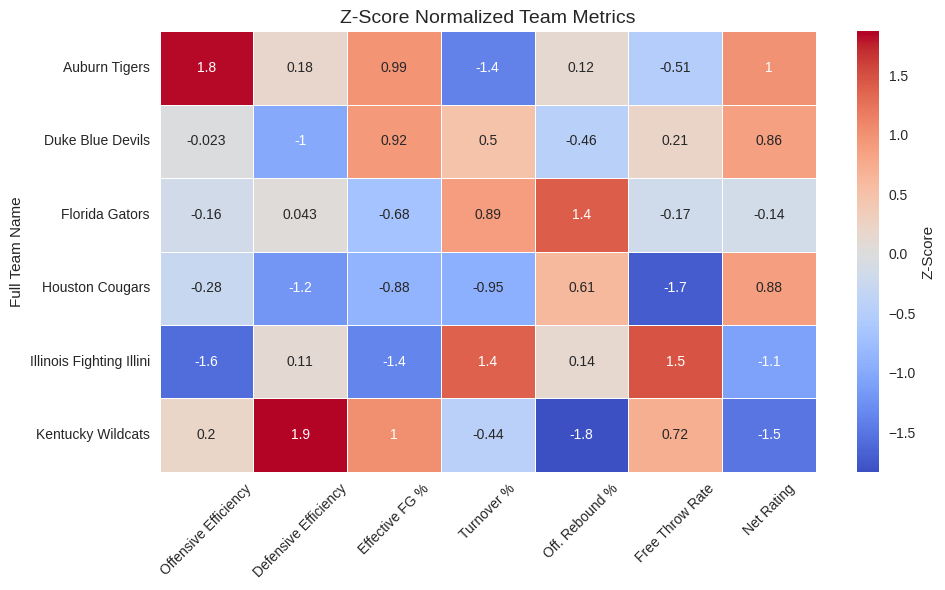

In [13]:
# Define relevant metrics
metrics = ['Offensive Efficiency', 'Defensive Efficiency', 'Effective FG %',
           'Turnover %', 'Off. Rebound %', 'Free Throw Rate', 'Net Rating']

# Make a copy and compute Z-scores
df_zscore = team_summary.copy()
df_zscore[metrics] = df_zscore[metrics].apply(zscore)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_zscore[metrics], annot=True, cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': 'Z-Score'})
plt.title("Z-Score Normalized Team Metrics", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

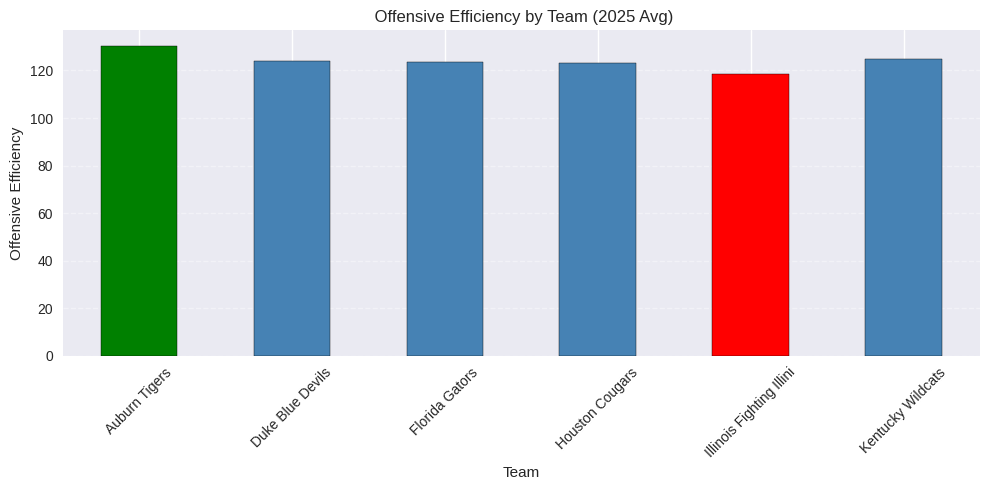

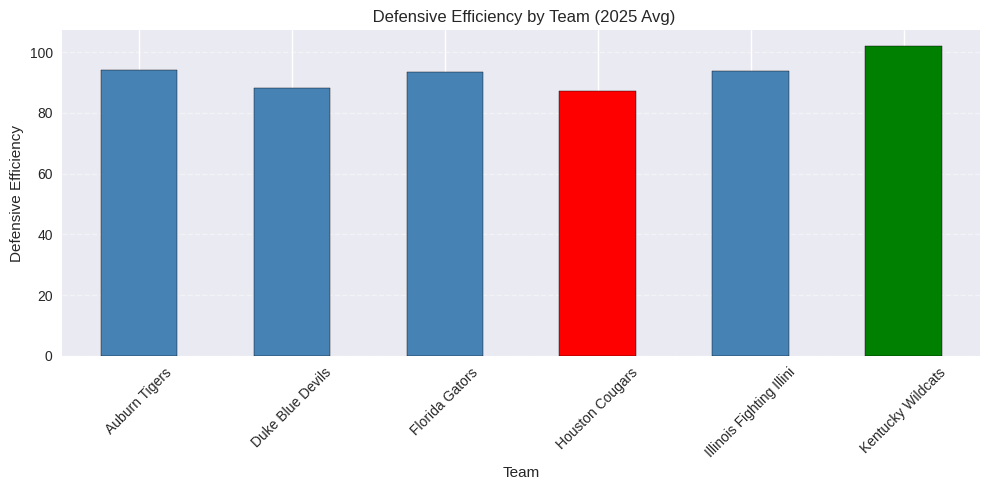

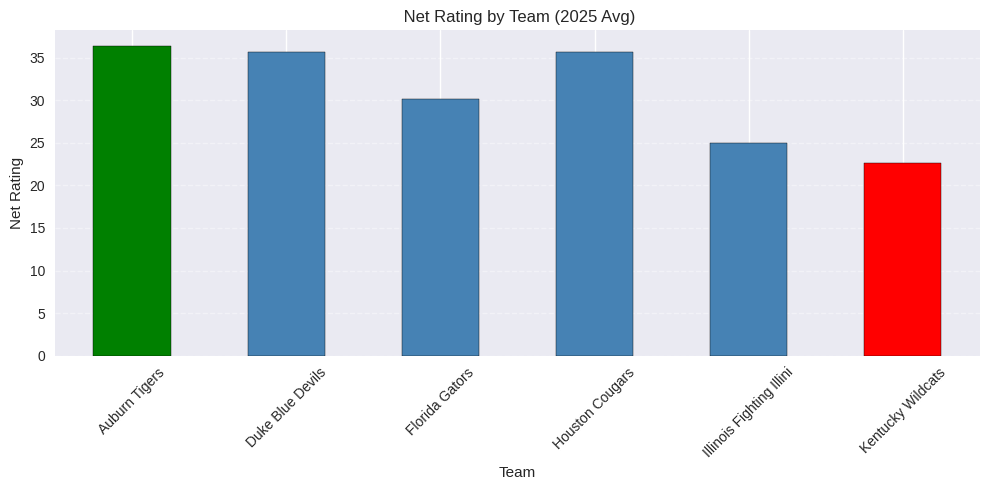

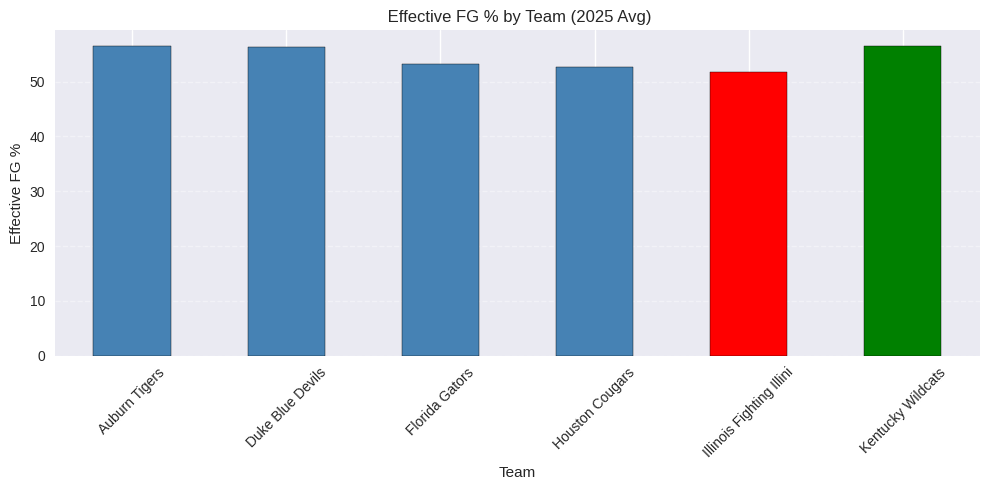

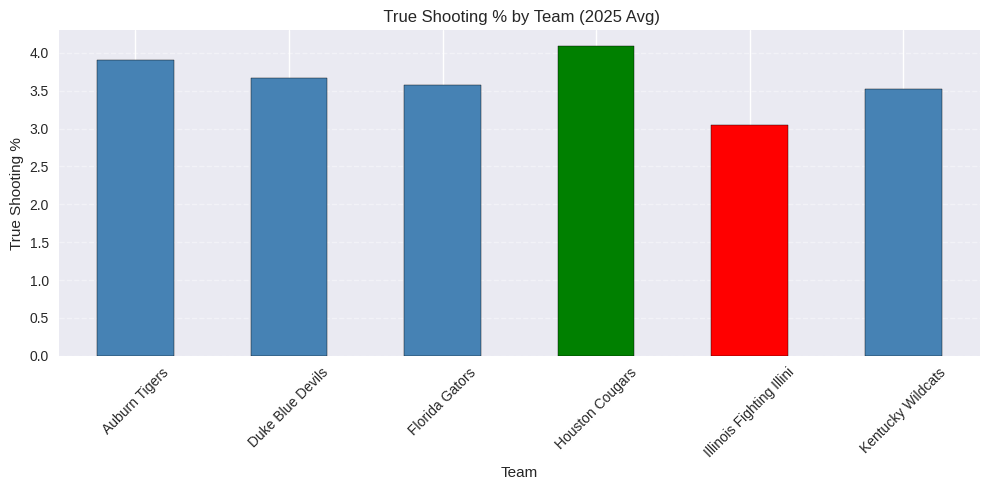

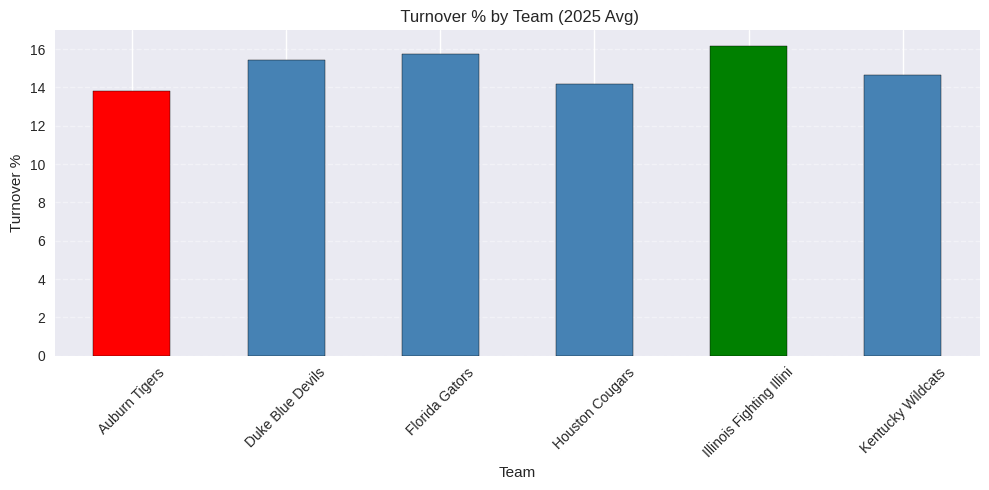

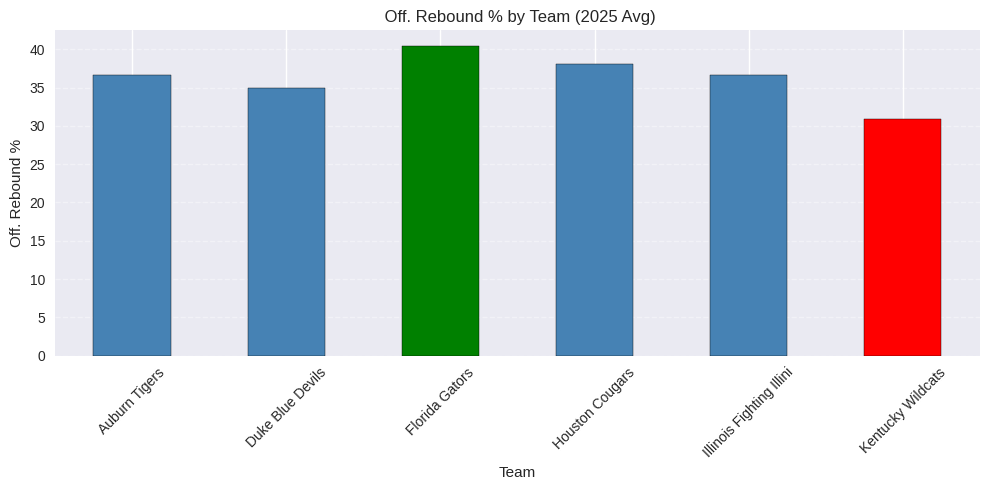

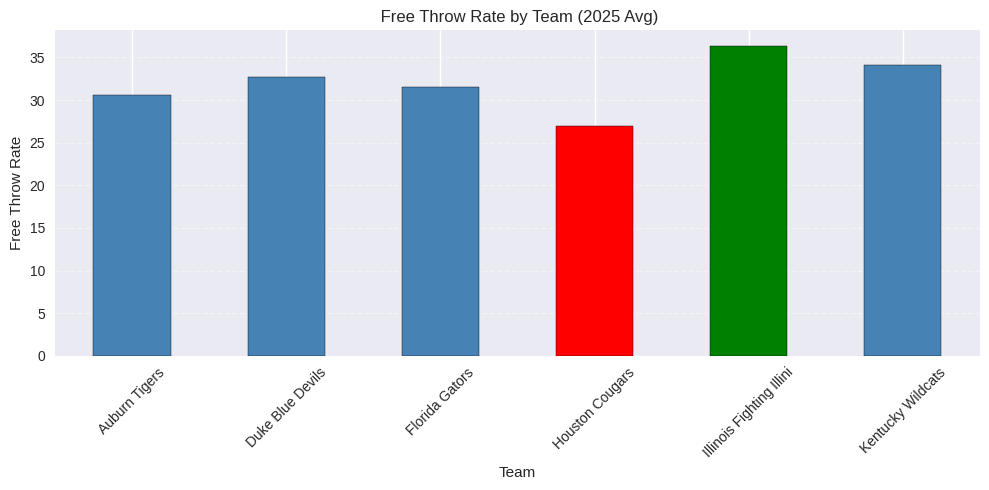

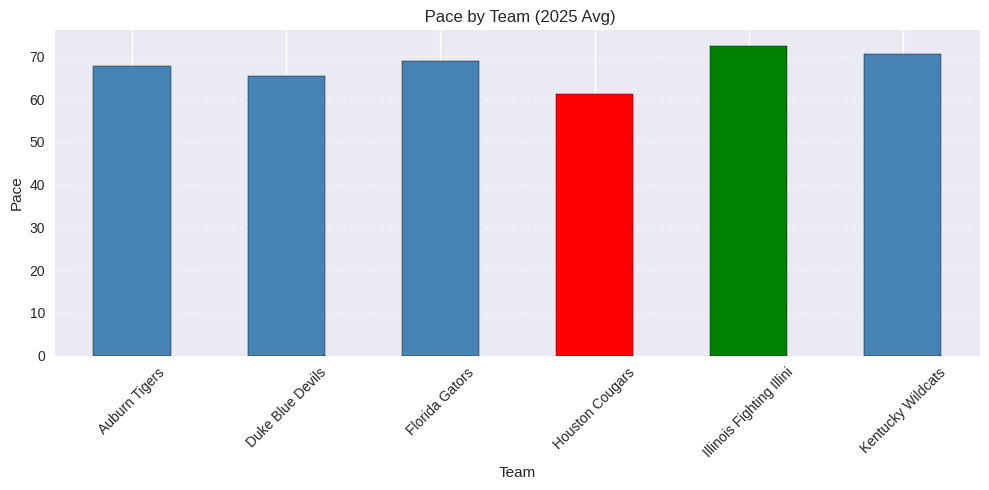

In [14]:
for col in team_summary.columns:
    values = team_summary[col]
    colors = []

    for val in values:
        if val == values.max():
            colors.append("green")
        elif val == values.min():
            colors.append("red")
        else:
            colors.append("steelblue")

    plt.figure(figsize=(10, 5))
    values.plot(kind="bar", color=colors, edgecolor="black")
    plt.title(f" {col} by Team (2025 Avg)")
    plt.ylabel(col)
    plt.xlabel("Team")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

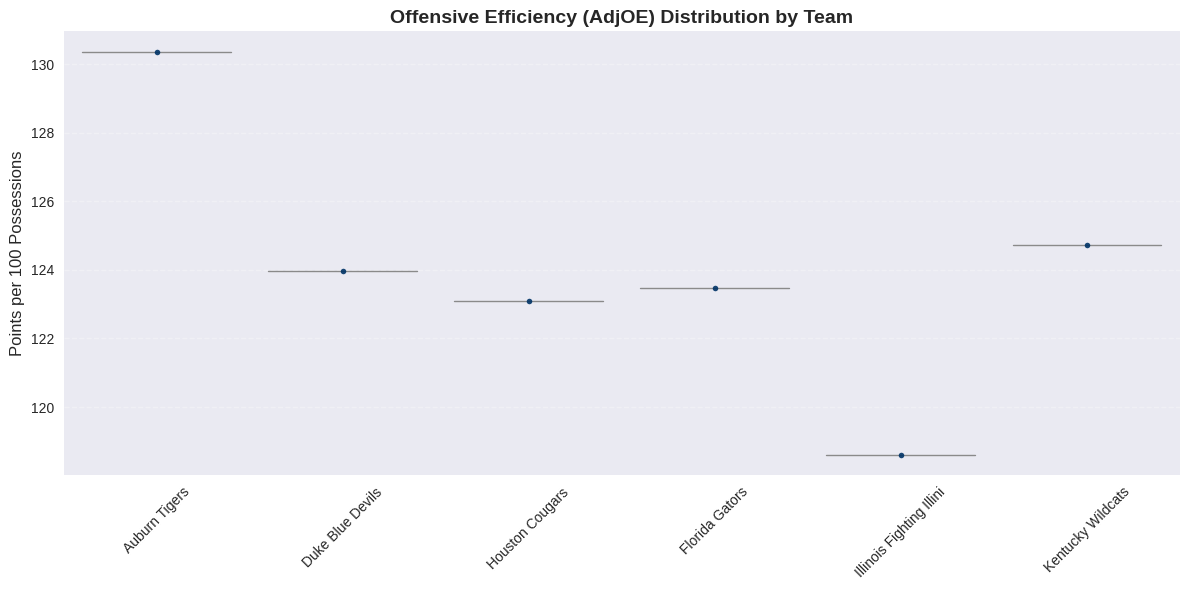

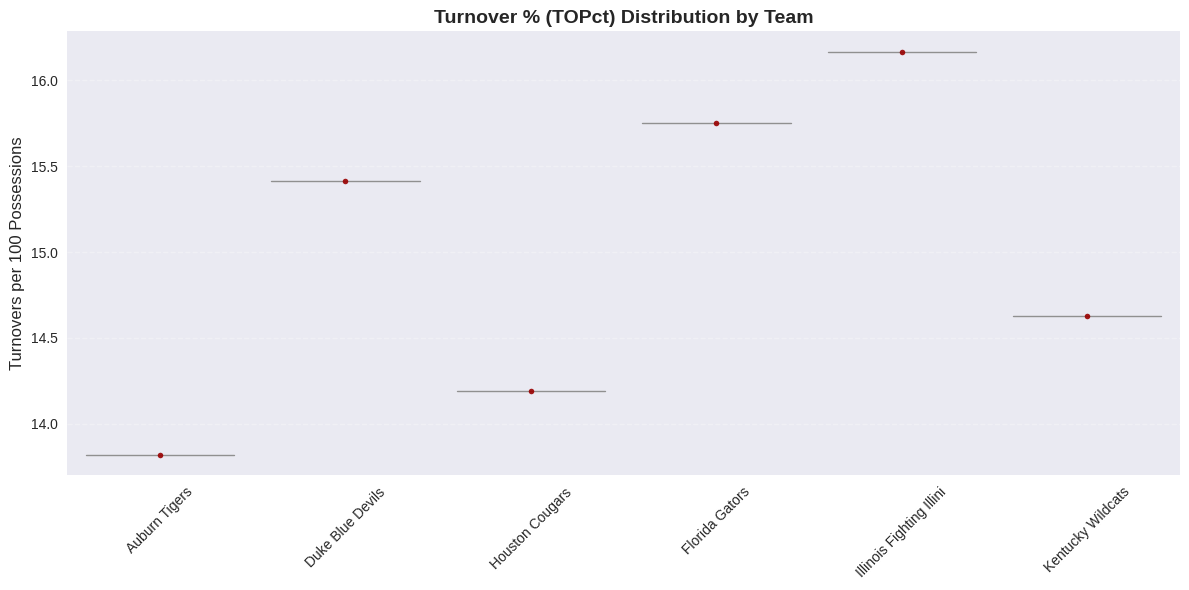

In [15]:
# Offensive Efficiency (violin + strip plot for clarity)
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_teams, x='Full Team Name', y='AdjOE',
    inner=None, linewidth=1, color="#cce5ff"
)
sns.swarmplot(
    data=df_teams, x='Full Team Name', y='AdjOE',
    size=4, color="#003366", alpha=0.9
)

plt.title("Offensive Efficiency (AdjOE) Distribution by Team", fontsize=14, fontweight='bold')
plt.ylabel("Points per 100 Possessions", fontsize=12)
plt.xlabel("")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Turnover %
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df_teams, x='Full Team Name', y='TOPct',
    inner=None, linewidth=1, color="#ffe0e6"
)
sns.swarmplot(
    data=df_teams, x='Full Team Name', y='TOPct',
    size=4, color="#990000", alpha=0.9
)

plt.title("Turnover % (TOPct) Distribution by Team", fontsize=14, fontweight='bold')
plt.ylabel("Turnovers per 100 Possessions", fontsize=12)
plt.xlabel("")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

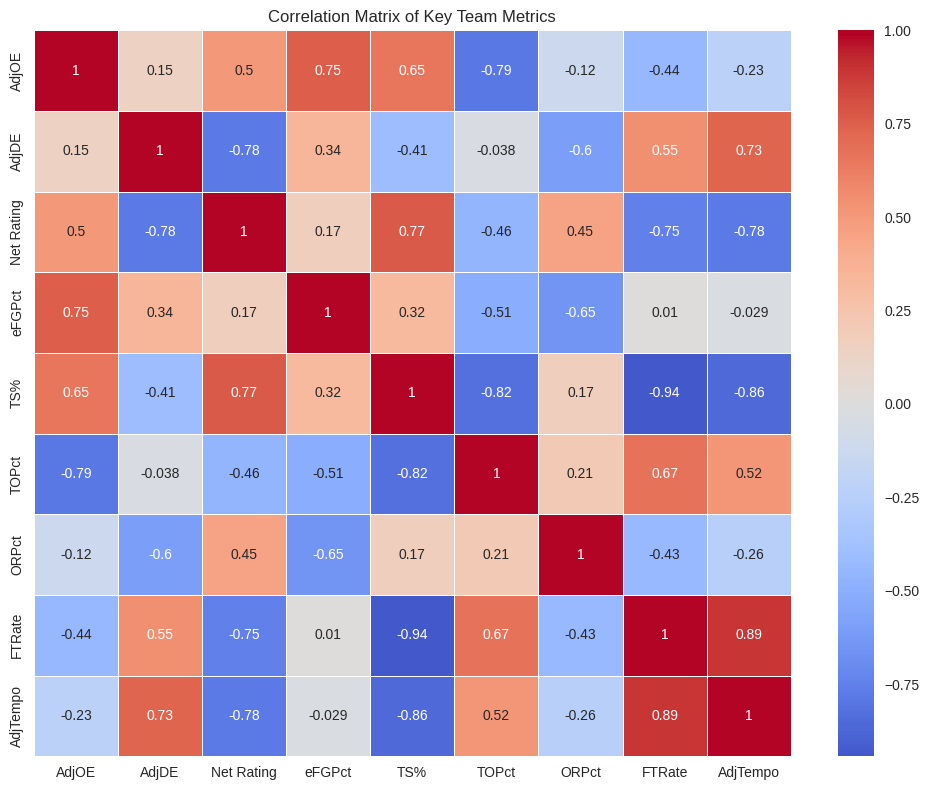

In [16]:
# Select only numeric columns
corr_features = [
    "AdjOE", "AdjDE", "Net Rating", "eFGPct", "TS%", "TOPct", "ORPct", "FTRate", "AdjTempo"
]

corr_matrix = df_teams[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Key Team Metrics")
plt.tight_layout()
plt.show()

###**Step 3 : Offensive Strategy Analysis**

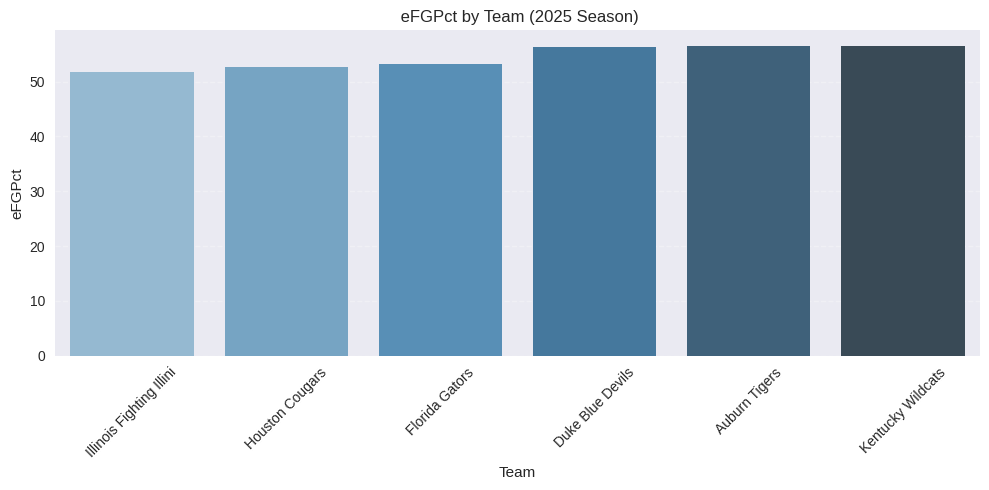

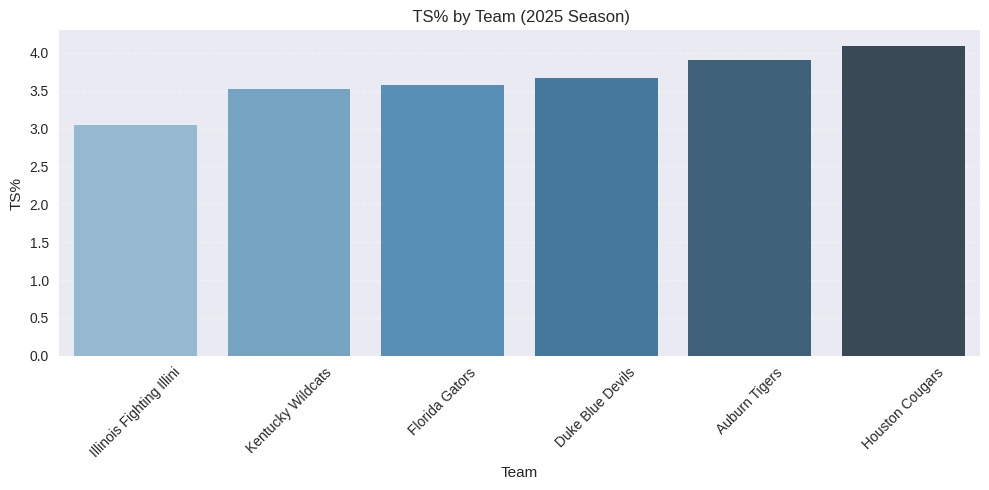

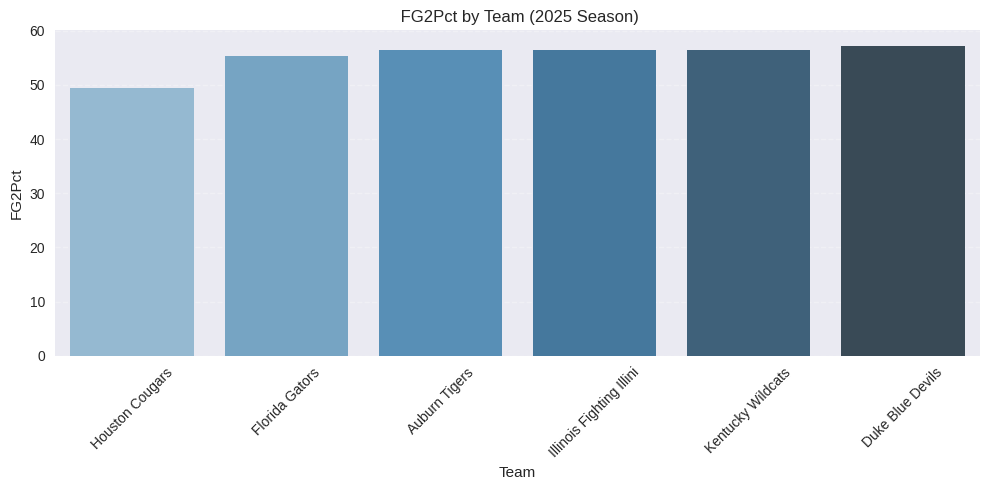

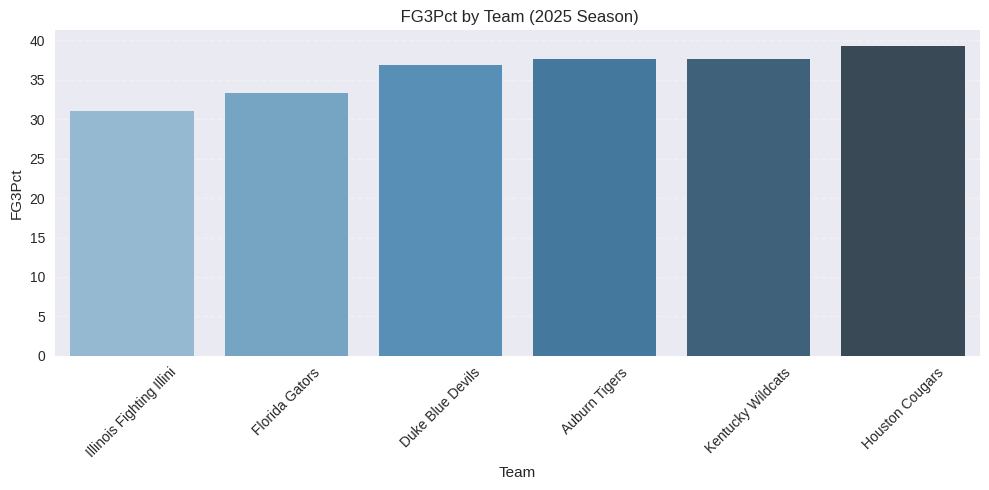

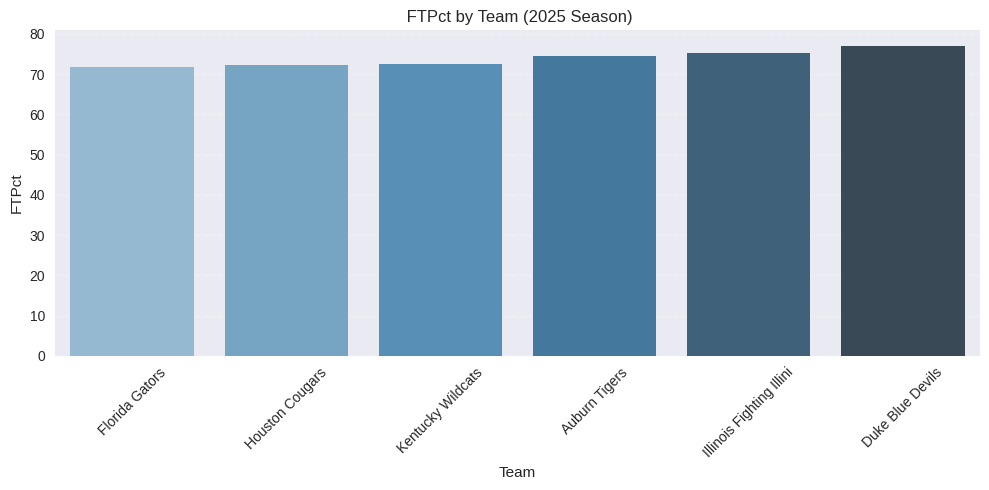

In [17]:
# SHOOTING EFFICIENCY : Group average metrics for each team
shooting_metrics = df_teams.groupby("Full Team Name").agg({
    "eFGPct": "mean",
    "TS%": "mean",
    "FG2Pct": "mean",
    "FG3Pct": "mean",
    "FTPct": "mean"
}).round(3)

# Plot shooting metrics
for col in shooting_metrics.columns:
    plt.figure(figsize=(10, 5))
    sorted_vals = shooting_metrics[col].sort_values(ascending=True)
    sns.barplot(x=sorted_vals.index, y=sorted_vals.values, palette="Blues_d")
    plt.title(f" {col} by Team (2025 Season)")
    plt.ylabel(col)
    plt.xlabel("Team")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

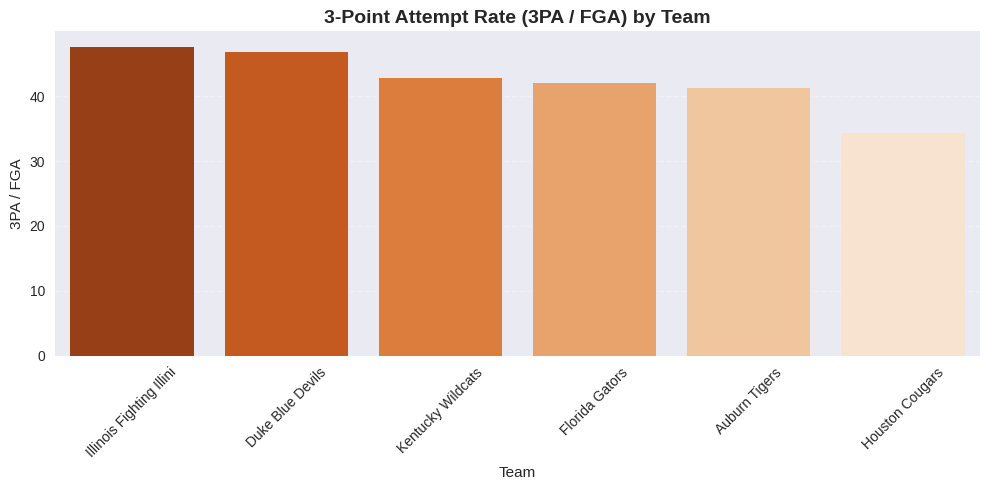

In [18]:
# Shot Selection — 3PA / FGA (Three-Point Attempt Rate)
# Team-level average of 3-point attempt rate
shot_selection = df_teams.groupby("Full Team Name").agg({
    "FG3Rate": "mean"
}).round(3)

# Sort for clarity
shot_selection_sorted = shot_selection.sort_values("FG3Rate", ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=shot_selection_sorted.index, y="FG3Rate", data=shot_selection_sorted, palette="Oranges_r")
plt.title("3-Point Attempt Rate (3PA / FGA) by Team", fontsize=14, fontweight='bold')
plt.ylabel("3PA / FGA")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


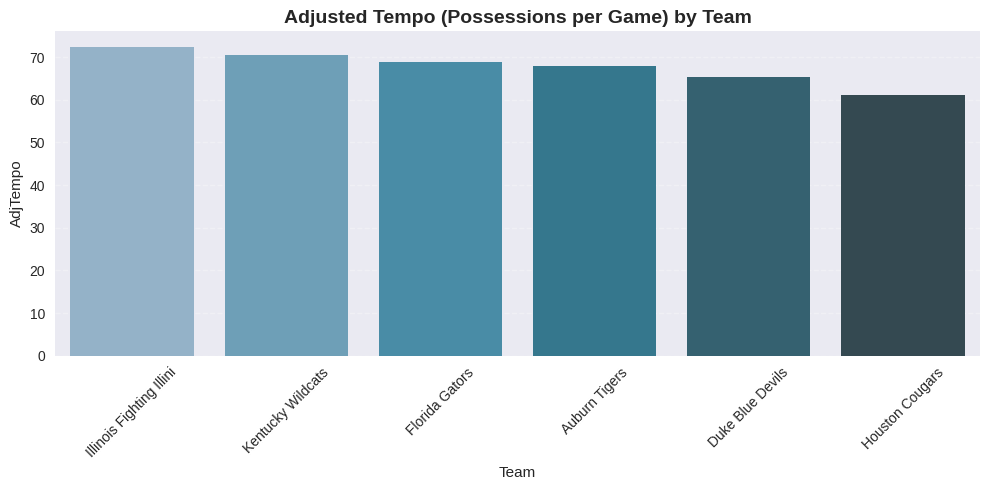

In [19]:
#Tempo and Possession Metrics
# Group average tempo per team
tempo_summary = df_teams.groupby("Full Team Name")["AdjTempo"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=tempo_summary.index, y=tempo_summary.values, palette="PuBuGn_d")
plt.title("Adjusted Tempo (Possessions per Game) by Team", fontsize=14, fontweight='bold')
plt.ylabel("AdjTempo")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

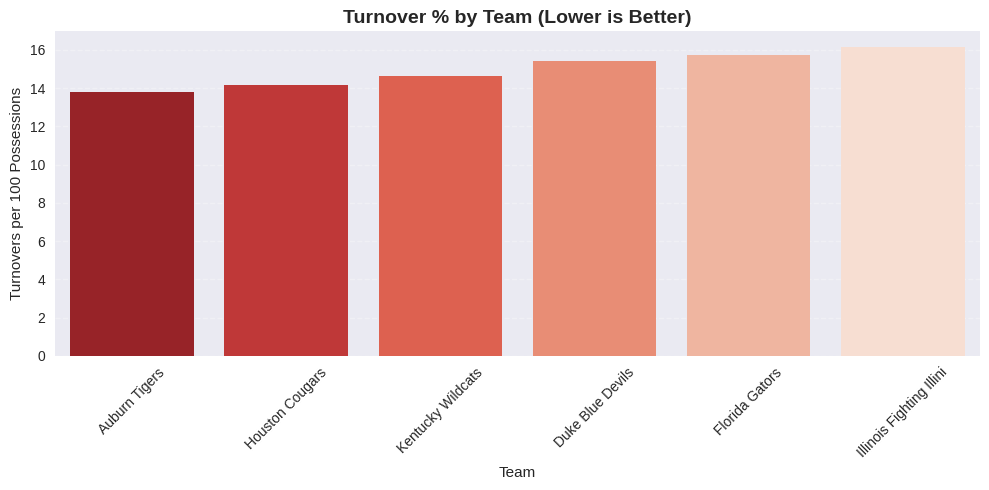

In [20]:
#Turnover Rate and Assist Rate Analysis
# Group averages per team
possession_control = df_teams.groupby("Full Team Name").agg({
    "TOPct": "mean",    # Turnovers per 100 possessions
    "ARate": "mean"     # Assist rate
}).round(3)

# Sort for plots
turnover_sorted = possession_control["TOPct"].sort_values()
assist_sorted = possession_control["ARate"].sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=turnover_sorted.index, y=turnover_sorted.values, palette="Reds_r")
plt.title("Turnover % by Team (Lower is Better)", fontsize=14, fontweight='bold')
plt.ylabel("Turnovers per 100 Possessions")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

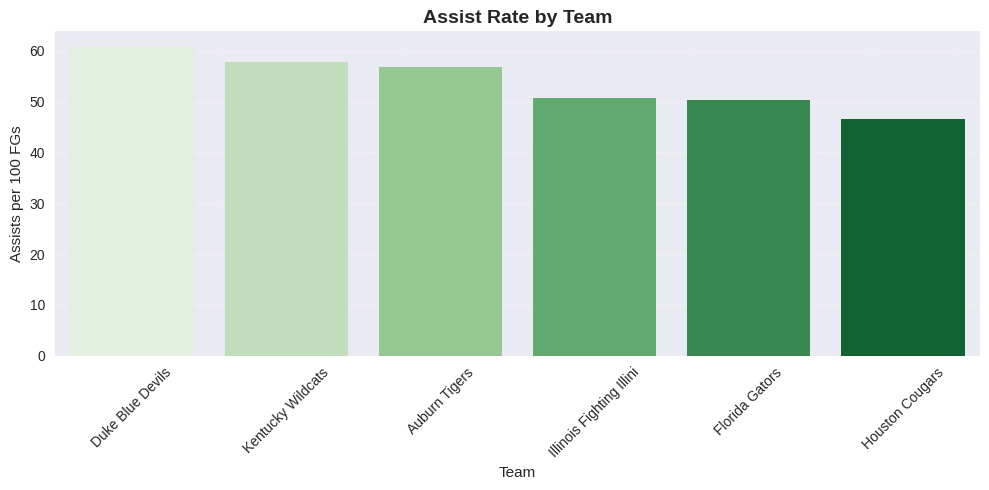

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=assist_sorted.index, y=assist_sorted.values, palette="Greens")
plt.title("Assist Rate by Team", fontsize=14, fontweight='bold')
plt.ylabel("Assists per 100 FGs")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

###**Step 4: Defensive Strategy Analysis**

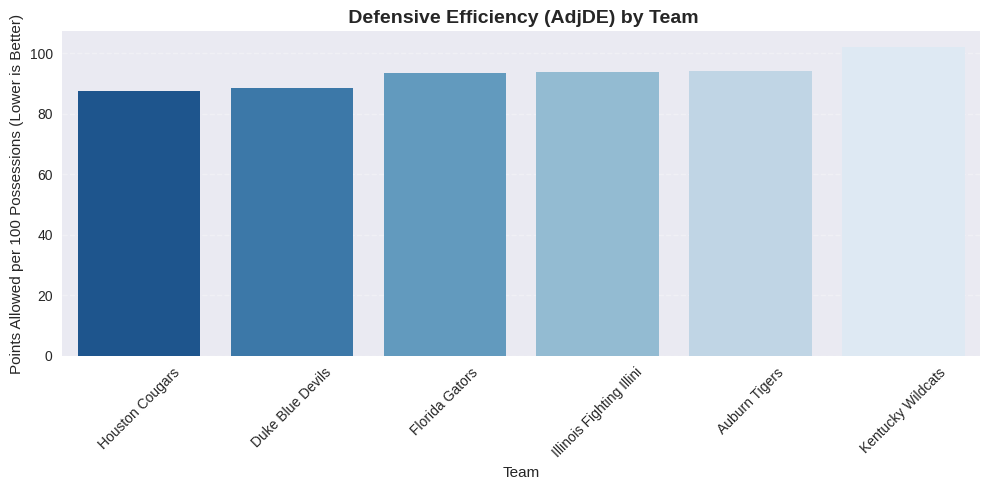

In [22]:
# Defensive Efficiency (AdjDE)
#Group by team
def_eff = df_teams.groupby("Full Team Name")["AdjDE"].mean().sort_values()

# Lower is better
plt.figure(figsize=(10, 5))
sns.barplot(x=def_eff.index, y=def_eff.values, palette="Blues_r")
plt.title(" Defensive Efficiency (AdjDE) by Team", fontsize=14, fontweight='bold')
plt.ylabel("Points Allowed per 100 Possessions (Lower is Better)")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

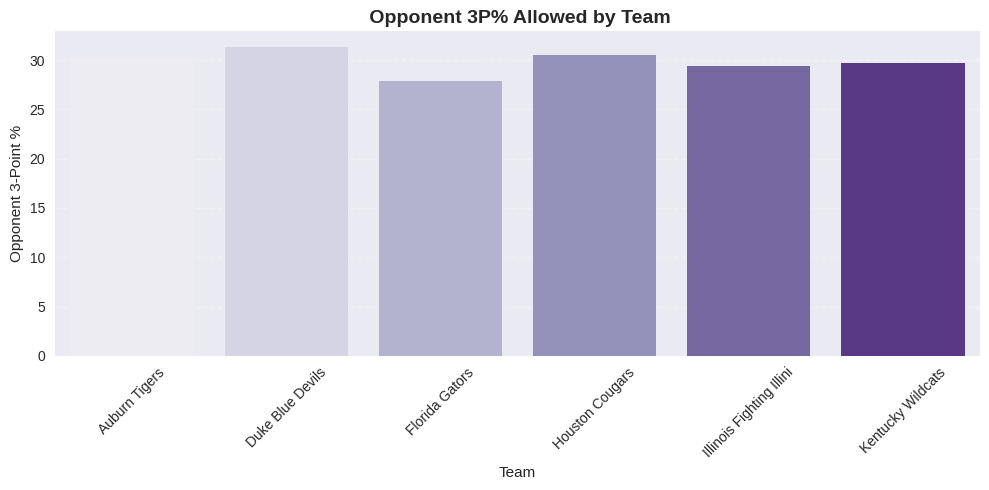

In [23]:
#  Defensive Rebounding & Opponent FG3%
#Group DRB and Opponent 3P%
def_rebound = df_teams.groupby("Full Team Name").agg({
    "ORPct": "mean",         # This is actually offensive rebounding % → use (1 - ORPct) to estimate opponent DRB%
    "OppFG3Pct": "mean"
}).round(3)

# Plot Opponent FG3% Allowed
plt.figure(figsize=(10, 5))
sns.barplot(x=def_rebound.index, y=def_rebound["OppFG3Pct"], palette="Purples")
plt.title(" Opponent 3P% Allowed by Team", fontsize=14, fontweight='bold')
plt.ylabel("Opponent 3-Point %")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

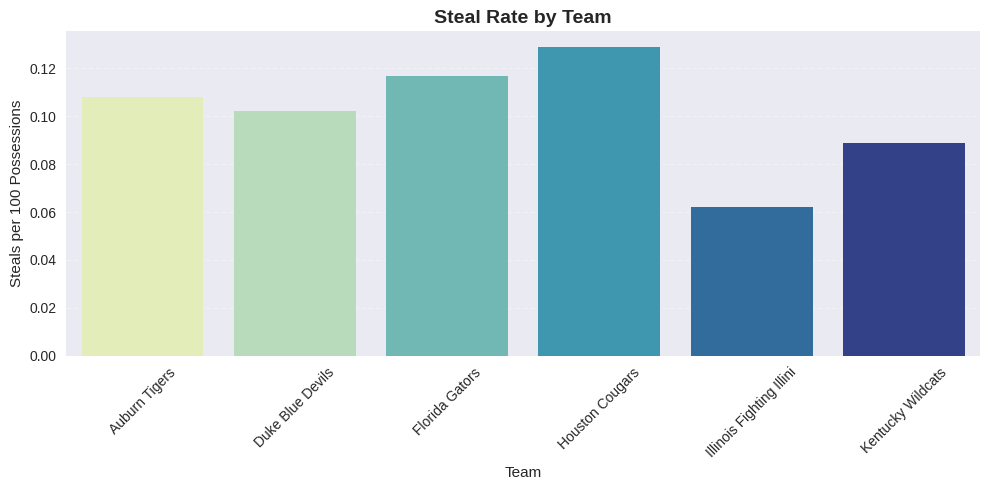

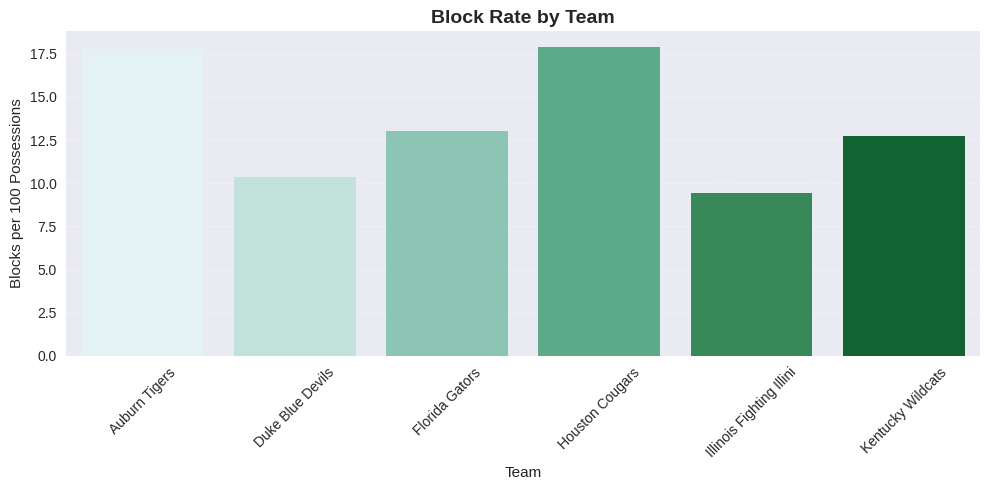

In [24]:
# Steal and Block Rates
# Group by steal and block metrics
disruption = df_teams.groupby("Full Team Name").agg({
    "StlRate": "mean",
    "BlockPct": "mean"
}).round(3)

# Plot steals
plt.figure(figsize=(10, 5))
sns.barplot(x=disruption.index, y=disruption["StlRate"], palette="YlGnBu")
plt.title("Steal Rate by Team", fontsize=14, fontweight='bold')
plt.ylabel("Steals per 100 Possessions")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Plot blocks
plt.figure(figsize=(10, 5))
sns.barplot(x=disruption.index, y=disruption["BlockPct"], palette="BuGn")
plt.title("Block Rate by Team", fontsize=14, fontweight='bold')
plt.ylabel("Blocks per 100 Possessions")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

###**Step 5: Advanced Metrics Analysis**

In [25]:
# Compute Four Factors + Net Rating
# Compute team averages
four_factors = df_teams.groupby("Full Team Name").agg({
    "eFGPct": "mean",
    "TOPct": "mean",
    "ORPct": "mean",
    "FTRate": "mean",
    "Net Rating": "mean"
}).round(3)

# Rename for clarity
four_factors.rename(columns={
    "eFGPct": "eFG%",
    "TOPct": "TOV%",
    "ORPct": "ORB%",
    "FTRate": "FTR",
}, inplace=True)

In [26]:
# Simulate Strength of Schedule (SOS) & Adjusted Net Rating
np.random.seed(42)
four_factors["SOS"] = np.random.normal(loc=0, scale=2, size=len(four_factors)).round(2)
four_factors["Adj Net Rating"] = (four_factors["Net Rating"] + four_factors["SOS"]).round(2)

In [27]:
display(four_factors)

,eFG%,TOV%,ORB%,FTR,Net Rating,SOS,Adj Net Rating
Full Team Name,,,,,,,
Auburn Tigers,56.417,13.818,36.620,30.558,36.379,0.99,37.37
Duke Blue Devils,56.286,15.413,34.911,32.653,35.618,-0.28,35.34
Florida Gators,53.132,15.749,40.436,31.540,30.127,1.30,31.43
Houston Cougars,52.732,14.191,38.043,27.010,35.701,3.05,38.75
Illinois Fighting Illini,51.779,16.166,36.663,36.357,24.930,-0.47,24.46
Kentucky Wildcats,56.509,14.626,30.861,34.161,22.625,-0.47,22.16


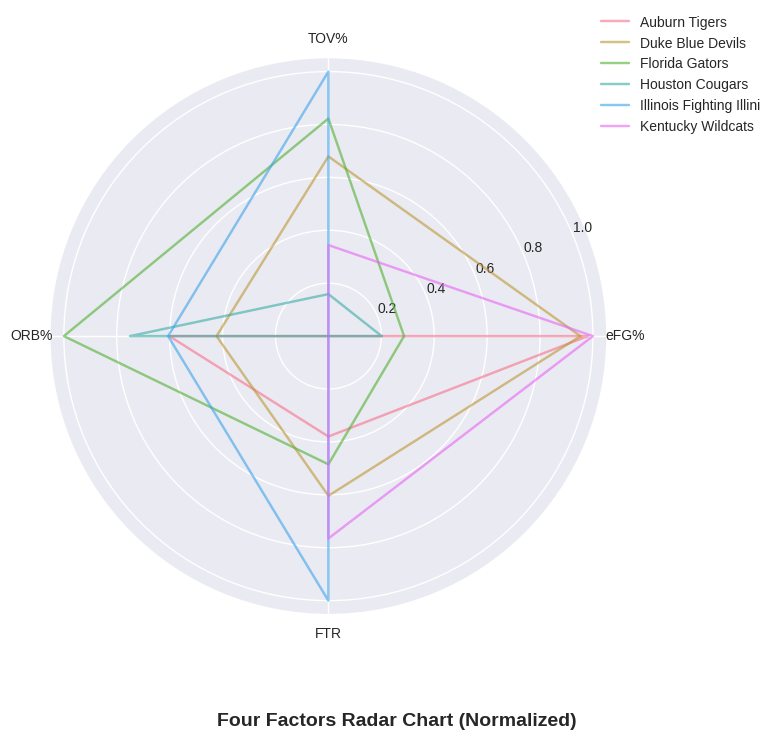

In [28]:
# Radar Chart for the Four Factors
from sklearn.preprocessing import MinMaxScaler

# === Normalize Four Factors ===
radar_features = ["eFG%", "TOV%", "ORB%", "FTR"]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(four_factors[radar_features])
scaled_df = pd.DataFrame(scaled, index=four_factors.index, columns=radar_features)

# === Radar Chart Setup ===
labels = radar_features
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the circle

# === Plot Radar Chart ===
plt.figure(figsize=(8, 8))
for team in scaled_df.index:
    values = scaled_df.loc[team].tolist()
    values += values[:1]
    plt.polar(angles, values, label=team, alpha=0.6)

plt.xticks(angles[:-1], labels)

# === Move title below ===
plt.figtext(0.5, 0.02, "Four Factors Radar Chart (Normalized)", ha="center", fontsize=14, fontweight="bold")

# Legend and layout
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout(rect=[0, 0.05, 1, 1])  # make room for bottom title
plt.show()

###**Step 6: Kentucky vs Illinois Matchup Analysis**

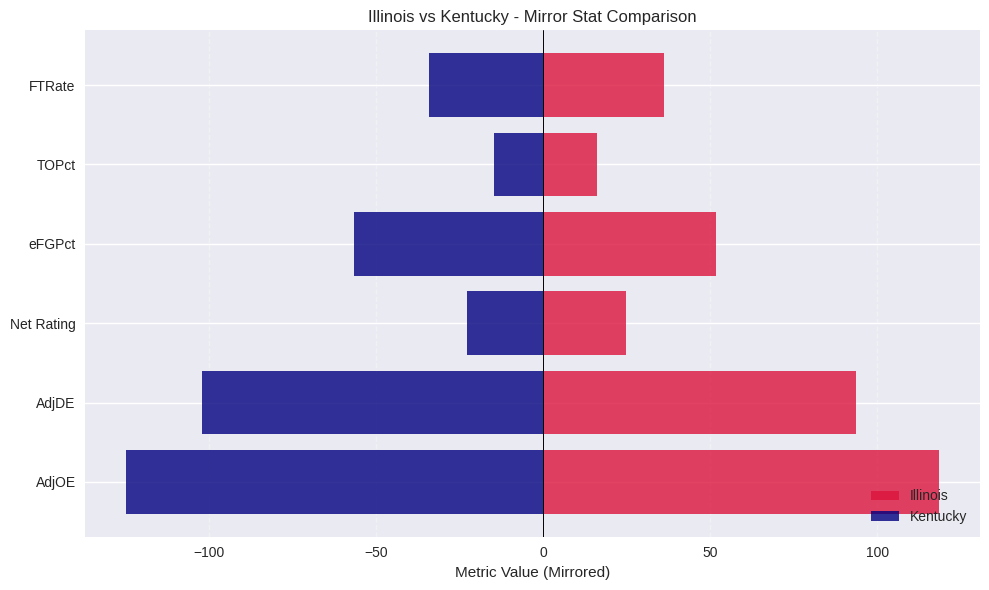

In [29]:
# Define key metrics
metrics = ["AdjOE", "AdjDE", "Net Rating", "eFGPct", "TOPct", "FTRate"]
ill = df_teams[df_teams["Full Team Name"] == "Illinois Fighting Illini"][metrics].mean()
ken = df_teams[df_teams["Full Team Name"] == "Kentucky Wildcats"][metrics].mean()

# Mirror bar chart
fig, ax = plt.subplots(figsize=(10, 6))

y = np.arange(len(metrics))
ax.barh(y, ill, color="crimson", alpha=0.8, label="Illinois")
ax.barh(y, -ken, color="navy", alpha=0.8, label="Kentucky")

ax.set_yticks(y)
ax.set_yticklabels(metrics)
ax.set_xlabel("Metric Value (Mirrored)")
ax.set_title("Illinois vs Kentucky - Mirror Stat Comparison")
ax.legend(loc="lower right")
plt.grid(axis='x', linestyle="--", alpha=0.3)
plt.axvline(0, color="black", linewidth=0.7)
plt.tight_layout()
plt.show()

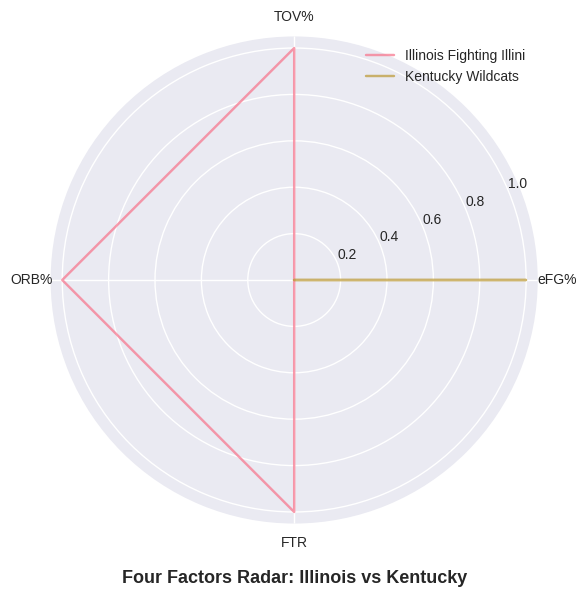

In [30]:
# Normalize again using just those two teams
subset = four_factors.loc[["Illinois Fighting Illini", "Kentucky Wildcats"]]
radar_features = ["eFG%", "TOV%", "ORB%", "FTR"]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(subset[radar_features])
scaled_df = pd.DataFrame(scaled, index=subset.index, columns=radar_features)

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(radar_features), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 6))
for team in scaled_df.index:
    values = scaled_df.loc[team].tolist() + [scaled_df.loc[team].tolist()[0]]
    plt.polar(angles, values, label=team, alpha=0.7)

plt.xticks(angles[:-1], radar_features)
plt.figtext(0.5, 0.02, "Four Factors Radar: Illinois vs Kentucky", ha="center", fontsize=13, fontweight="bold")
plt.legend(loc="upper right")
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [31]:
def plot_possession_flow(team_name):
    team_df = df_teams[df_teams["Full Team Name"] == team_name]

    # Averages
    adj_oe = team_df["AdjOE"].mean()
    tov_pct = team_df["TOPct"].mean()
    ftr = team_df["FTRate"].mean()
    efg = team_df["eFGPct"].mean()

    possessions = 100
    points = adj_oe
    turnovers = tov_pct * possessions
    fgm = points / 2
    missed = 50 - fgm
    fouls = ftr * 50
    off_rebs = team_df["ORPct"].mean() * missed
    def_rebs = missed - off_rebs
    shot_attempts = fgm + missed

    labels = [
        f"{team_name} Possession", "Shot Attempt", "Turnover", "Foul",
        "Made Shot", "Missed Shot", "Offensive Rebound", "Defensive Rebound"
    ]

    sources = [0, 0, 0, 1, 1, 5, 5]
    targets = [1, 2, 3, 4, 5, 6, 7]
    values  = [shot_attempts, turnovers, fouls, fgm, missed, off_rebs, def_rebs]

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            label=labels,
            color="lightsteelblue"
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color="rgba(0, 100, 255, 0.3)"
        )
    )])

    fig.update_layout(title_text=f"Possession Flow: {team_name}", font_size=12)
    fig.show()

# Plot for both teams
plot_possession_flow("Illinois Fighting Illini")
plot_possession_flow("Kentucky Wildcats")

In [32]:
# Filter teams
kentucky = df_teams[df_teams["Full Team Name"] == "Kentucky Wildcats"]
illinois = df_teams[df_teams["Full Team Name"] == "Illinois Fighting Illini"]

# Metrics to compare
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]

# Calculate mean values
kentucky_avg = kentucky[metrics].mean()
illinois_avg = illinois[metrics].mean()

# Compute differences
diff = (kentucky_avg - illinois_avg).sort_values(ascending=False)

# Top 5 Kentucky advantages
top_advantages = diff.head(5)

# Bottom 5 Illinois disadvantages (more negative values)
illinois_disadv = diff.tail(5)

# Build mirrored bar chart
fig = go.Figure()

# Kentucky Advantage — Green bars (positive direction)
fig.add_trace(go.Bar(
    y=top_advantages.index,
    x=top_advantages.values,
    name="Kentucky Advantage",
    orientation='h',
    marker=dict(color="green")
))

# Illinois Disadvantage — Red bars (negative direction)
fig.add_trace(go.Bar(
    y=illinois_disadv.index,
    x=illinois_disadv.values,
    name="Illinois Disadvantage",
    orientation='h',
    marker=dict(color="crimson")
))

# Update layout
fig.update_layout(
    title="Kentucky's Top 5 Advantages vs Illinois | Illinois's Key Disadvantages",
    barmode='relative',
    xaxis_title="Difference in Metric Value (Kentucky - Illinois)",
    yaxis_title="Metric",
    template="plotly_white",
    height=500,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5)
)

fig.show()

In [33]:
team_summary['Team Name'] = team_summary.index.tolist()

# Filter for the two teams
comparison_df = team_summary[team_summary['Team Name'].isin(['Illinois Fighting Illini', 'Kentucky Wildcats'])].set_index('Team Name').T
comparison_df.columns = ['Illinois', 'Kentucky']
comparison_df['Difference'] = comparison_df['Kentucky'] - comparison_df['Illinois']

# Focus on meaningful metrics
metrics = [
    'Offensive Efficiency', 'Defensive Efficiency', 'Effective FG %',
    'Turnover %', 'Off. Rebound %', 'Free Throw Rate'
]
comparison_df_filtered = comparison_df.loc[metrics].reset_index()
comparison_df_filtered.rename(columns={'index': 'Metric'}, inplace=True)

# Plot grouped bar chart
fig = px.bar(
    comparison_df_filtered.melt(id_vars='Metric', value_vars=['Illinois', 'Kentucky']),
    x='Metric', y='value', color='variable',
    barmode='group', text='value',
    title='Illinois vs Kentucky – Key Metrics Comparison'
)
fig.update_layout(
    yaxis_title='Metric Value',
    xaxis_title='',
    plot_bgcolor='white',
    title_font=dict(size=18),
    legend_title_text=''
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

###**Step 7: Comparative Study of Florida, Auburn, Duke, and Houston**

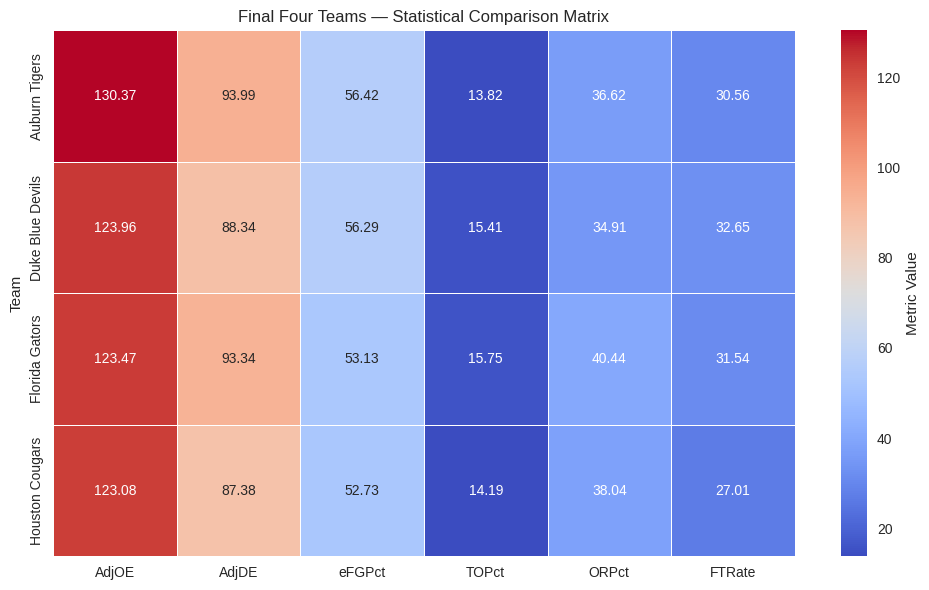

In [34]:
#  Final Four teams
final_four_teams = [
    "Florida Gators",
    "Auburn Tigers",
    "Duke Blue Devils",
    "Houston Cougars"
]

# Filter 2025 Final Four teams
final_four_df = df_teams[df_teams["Full Team Name"].isin(final_four_teams)]

#  Compute key metrics
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]
comparison_matrix = final_four_df.groupby("Full Team Name")[metrics].mean().round(2)

#  Heatmap Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'label': 'Metric Value'})
plt.title("Final Four Teams — Statistical Comparison Matrix")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [35]:
# Define team colors
team_colors = {
    "Florida Gators": "blue",
    "Auburn Tigers": "orange",
    "Duke Blue Devils": "green",
    "Houston Cougars": "red"
}

# Create bar polar chart traces
fig = go.Figure()

for team in comparison_matrix.index:
    for metric in metrics:
        fig.add_trace(go.Barpolar(
            r=[comparison_matrix.loc[team, metric]],
            theta=[metric],
            name=team,
            marker_color=team_colors.get(team, "gray"),
            opacity=0.6
        ))

# Layout customization
fig.update_layout(
    title="Final Four — Strength vs Weakness (Bar Polar Style)",
    polar=dict(
        radialaxis=dict(visible=True, linewidth=1),
        angularaxis=dict(rotation=90)
    ),
    template="plotly_white",
    showlegend=True
)

fig.show()

###**STEP 8: Clustering on the entire dataset and 6 teams**

In [36]:
from sklearn.cluster import KMeans
# Load your CSV file again
df_teams = pd.read_csv("/content/DEV _ March Madness.csv")  # Replace with correct path
#  Filter for 2025 season only
df_teams_2025 = df_teams[df_teams["Season"] == 2025]

# Define the Final Four and Illinois
final_four_teams = ["Florida Gators", "Auburn Tigers", "Duke Blue Devils", "Houston Cougars"]
illinois_team = "Illinois Fighting Illini"

# Select metrics
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]


In [37]:

# Clean and group
df_cluster = df_teams_2025[["Full Team Name"] + metrics].dropna()
df_cluster = df_cluster.groupby("Full Team Name").mean().reset_index()

# Normalize
scaler = StandardScaler()
scaled = scaler.fit_transform(df_cluster[metrics])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled)

# Assemble final DataFrame
df_cluster_scaled = pd.DataFrame(scaled, columns=metrics)
df_cluster_scaled["Full Team Name"] = df_cluster["Full Team Name"]
df_cluster_scaled["Cluster"] = clusters

# Label clusters
df_cluster_scaled["Team Type"] = df_cluster_scaled["Cluster"].map({
    0: "Pace & Attack",
    1: "Defensive Stronghold",
    2: "Balanced Efficiency",
    3: "High Tempo Shooters"
})

# Label group
df_cluster_scaled["Group"] = df_cluster_scaled["Full Team Name"].apply(
    lambda x: "Final Four" if x in final_four_teams else ("Illinois" if x == illinois_team else "Other")
)

In [38]:
# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
df_cluster_scaled["PC1"] = components[:, 0]
df_cluster_scaled["PC2"] = components[:, 1]

# Plot
fig = px.scatter(
    df_cluster_scaled,
    x="PC1",
    y="PC2",
    color="Team Type",
    symbol="Group",
    hover_name="Full Team Name",
    title="Team Clustering by Playing Style – 2025 Season",
    template="plotly_white"
)
fig.update_traces(marker=dict(size=12, line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(height=600)
fig.show()

In [39]:
# Show team cluster assignments
cluster_summary = df_cluster_scaled[["Full Team Name", "Team Type", "Group", "Cluster"]].sort_values("Cluster")
display(cluster_summary)
# Save to CSV
cluster_summary.to_csv("team_clusters_2025.csv", index=False)

,Full Team Name,Team Type,Group,Cluster
0,Abilene Christian Wildcats,Pace & Attack,Other,0
1,Air Force Falcons,Pace & Attack,Other,0
3,Alabama A&M Bulldogs,Pace & Attack,Other,0
363,Youngstown State Penguins,Pace & Attack,Other,0
7,Alcorn State Braves,Pace & Attack,Other,0
...,...,...,...,...
30,Brown Bears,High Tempo Shooters,Other,3
29,Bradley Braves,High Tempo Shooters,Other,3
8,American Eagles,High Tempo Shooters,Other,3
6,Albany Great Danes,High Tempo Shooters,Other,3


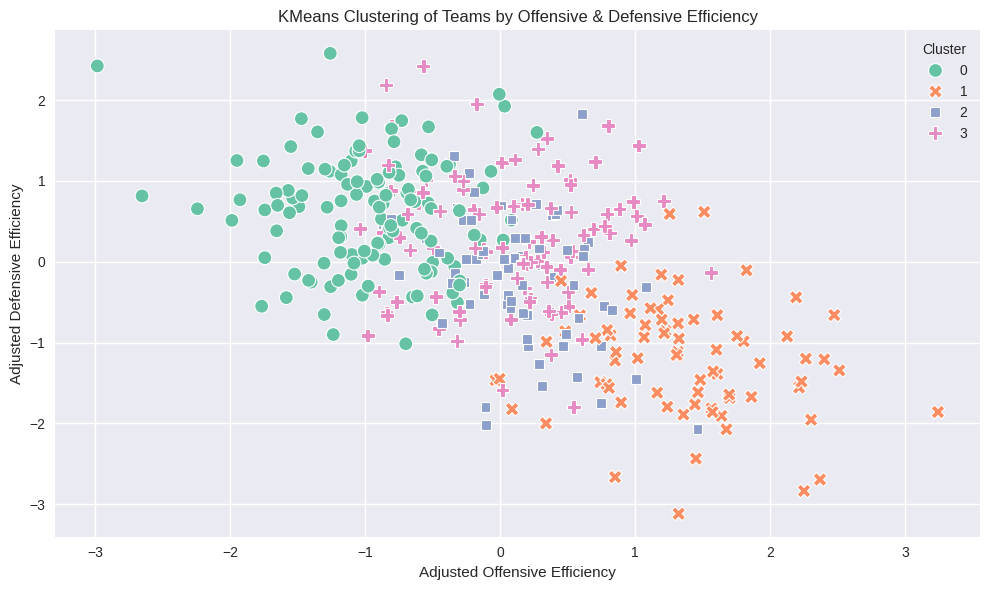

In [40]:
# Scatter of two key metrics with cluster coloring
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster_scaled, x='AdjOE', y='AdjDE', hue='Cluster', style='Cluster', palette='Set2', s=100)

plt.title("KMeans Clustering of Teams by Offensive & Defensive Efficiency")
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Adjusted Defensive Efficiency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
#6 teams data
# Load the dataset
# Define top 6 teams
top_6_teams = [
    "Florida Gators", "Auburn Tigers", "Duke Blue Devils",
    "Houston Cougars", "Kentucky Wildcats", "Illinois Fighting Illini"
]

# Metrics to cluster
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]
df_2025 = df_teams[df_teams["Season"] == 2025]
df_top6 = df_2025[df_2025["Full Team Name"].isin(top_6_teams)]
df_top6_avg = df_top6.groupby("Full Team Name")[metrics].mean().reset_index()

# Cluster on full 2025 data
df_cluster = df_2025.groupby("Full Team Name")[metrics].mean().dropna().reset_index()
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster[metrics])
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_cluster)

# Predict clusters for top 6
X_top6 = scaler.transform(df_top6_avg[metrics])
df_top6_avg["Cluster"] = kmeans.predict(X_top6)
cluster_map = {
    0: "Pace & Attack",
    1: "Defensive Stronghold",
    2: "Balanced Efficiency",
    3: "High Tempo Shooters"
}
df_top6_avg["Team Type"] = df_top6_avg["Cluster"].map(cluster_map)

# Define custom colors for each cluster type
cluster_colors = {
    "Pace & Attack": "skyblue",
    "Defensive Stronghold": "forestgreen",
    "Balanced Efficiency": "gold",
    "High Tempo Shooters": "salmon"
}


# Bar Chart: AdjOE by Team & Cluster
fig = px.bar(
    df_top6_avg,
    x="Team Type", # Change x-axis to Team Type
    y="AdjOE",
    color="Full Team Name", # Use team name for color to distinguish bars within clusters
    text="AdjOE", # Display AdjOE value on bars
    title="🔍 Top 6 Teams – Offensive Efficiency by Cluster (2025)",
    labels={"AdjOE": "Adjusted Offensive Efficiency", "Team Type": "Cluster Type"},
    template="plotly_white",
    # color_discrete_map=cluster_colors # Remove this as color is now by team name
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Cluster Type", # Update x-axis title
    yaxis_title="AdjOE",
    height=500,
    xaxis={'categoryorder':'category ascending'} # Order clusters alphabetically
)
fig.show()

###**Step 9: Illinois vs Final Four Teams - Comparative Analysis**

In [42]:
# Define teams of interest
final_four = ["Florida Gators", "Auburn Tigers", "Duke Blue Devils", "Houston Cougars"]
illinois = "Illinois Fighting Illini"
target_teams = final_four + [illinois]

# Filter for 2025 season
df_2025 = df_teams[df_teams["Season"] == 2025]
df_subset = df_2025[df_2025["Full Team Name"].isin(target_teams)]

# Choose key stats to compare
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]

# Group by team and compute mean
df_grouped = df_subset.groupby("Full Team Name")[metrics].mean().reset_index()

# Normalize with StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_grouped[metrics]), columns=metrics)
df_scaled["Team"] = df_grouped["Full Team Name"]

# Compute average for Final Four teams
df_final_four_avg = df_scaled[df_scaled["Team"].isin(final_four)][metrics].mean()

# Get Illinois stats
df_illinois = df_scaled[df_scaled["Team"] == illinois][metrics].iloc[0]

# Calculate differences
diff = df_final_four_avg - df_illinois

# Top 5 weaknesses (positive diffs), Top 5 strengths (negative diffs)
top_weaknesses = diff.sort_values(ascending=False).head(5)
top_strengths = diff.sort_values(ascending=True).head(5)


In [43]:
# Prepare for plotting
strengths_df = pd.DataFrame({
    "Metric": top_strengths.index,
    "Difference (Z-Score)": top_strengths.values,
    "Type": "Strength"
})
weaknesses_df = pd.DataFrame({
    "Metric": top_weaknesses.index,
    "Difference (Z-Score)": top_weaknesses.values,
    "Type": "Weakness"
})

comparison_df = pd.concat([strengths_df, weaknesses_df], axis=0)

# Plot chart
fig = px.bar(
    comparison_df,
    x="Difference (Z-Score)",
    y="Metric",
    color="Type",
    orientation="h",
    title="Illinois vs Final Four – Top 5 Strengths & Weaknesses (2025)",
    template="plotly_white",
    color_discrete_map={"Strength": "green", "Weakness": "crimson"}
)
fig.update_layout(
    yaxis_title="Metric",
    xaxis_title="Z-Score Difference",
    height=500
)
fig.show()

In [46]:
# Use df_comparison which contains the comparison data
# df_comparison has columns: 'Team Compared to Illinois', 'Metric', 'Illinois Value', 'Team Value', 'Difference'

fig = go.Figure()

# Add bars for each Final Four team's metric value
for team in df_comparison['Team Compared to Illinois'].unique():
    team_data = df_comparison[df_comparison['Team Compared to Illinois'] == team]
    fig.add_trace(go.Bar(
        x=team_data['Metric'],
        y=team_data['Team Value'],
        name=team,
        marker_color=team_colors.get(team, 'gray') # Use team_colors if defined, otherwise gray
    ))

# Add a line for Illinois's metric value
# Since Illinois's value is the same for a given metric across all comparisons,
# we can get it from any row where the metric is present.
illinois_plot_data = df_comparison[['Metric', 'Illinois Value']].drop_duplicates()

fig.add_trace(go.Scatter(
    x=illinois_plot_data['Metric'],
    y=illinois_plot_data['Illinois Value'],
    mode="lines+markers",
    name="Illinois Fighting Illini",
    line=dict(color="black", width=3, dash='dash')
))


fig.update_layout(
    title="Final Four Teams vs Illinois — Metric Comparison",
    barmode='group', # Group bars by Metric
    xaxis_title="Metric",
    yaxis_title="Value",
    template="plotly_white",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

NameError: name 'df_comparison' is not defined

In [47]:
# Final Four teams + Illinois
teams_of_interest = ["Florida Gators", "Auburn Tigers", "Duke Blue Devils", "Houston Cougars"]

# Filter 2025 data
df_2025 = df_teams[df_teams["Season"] == 2025]
df_subset = df_2025[df_2025["Full Team Name"].isin(teams_of_interest)]

# Metrics to analyze
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]

# Group by team and calculate averages
df_grouped = df_subset.groupby("Full Team Name")[metrics].mean().reset_index()

# Normalize with Z-score
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_grouped[metrics]), columns=metrics)
df_scaled["Team"] = df_grouped["Full Team Name"]

# Find top 3 metrics per team
strength_rows = []
for idx, row in df_scaled.iterrows():
    team = row["Team"]
    top_metrics = row.drop("Team").sort_values(ascending=False).head(3)
    for metric, value in top_metrics.items():
        strength_rows.append({
            "Team": team,
            "Top Metric": metric,
            "Z-Score": round(value, 2)
        })

df_strengths = pd.DataFrame(strength_rows)

# Plot: Grouped bar chart
fig = px.bar(
    df_strengths,
    x="Team",
    y="Z-Score",
    color="Top Metric",
    barmode="group",
    title="Top 3 Strengths of Each Final Four Team (2025)",
    template="plotly_white"
)
fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Normalized Strength (Z-Score)",
    height=600
)
fig.show()

In [48]:
# Create team-wise natural language descriptions
summary_data = []
for team in df_scaled["Team"]:
    team_row = df_scaled[df_scaled["Team"] == team].drop("Team", axis=1)
    top_3 = team_row.iloc[0].sort_values(ascending=False).head(3).index.tolist()
    summary = f"{team} excels in: {', '.join(top_3)}"
    summary_data.append({
        "Team": team,
        "Top 3 Strengths (Z-Score)": summary
    })

df_summary = pd.DataFrame(summary_data)

# Display the summary table
print(df_summary.to_markdown(index=False))

| Team             | Top 3 Strengths (Z-Score)                         |
|:-----------------|:--------------------------------------------------|
| Auburn Tigers    | Auburn Tigers excels in: AdjOE, AdjDE, eFGPct     |
| Duke Blue Devils | Duke Blue Devils excels in: FTRate, eFGPct, TOPct |
| Florida Gators   | Florida Gators excels in: ORPct, TOPct, AdjDE     |
| Houston Cougars  | Houston Cougars excels in: ORPct, AdjOE, TOPct    |


1. Florida is a high-efficiency shooting team with strong offensive rebounding and scoring per possession. Illinois needs to contest shots & box out better.
2. Auburn draws lots of fouls, scores efficiently, and dominates offensive boards. Illinois should avoid fouls & control second-chance points.
3. Duke is a high-octane offense with excellent shooters and offensive rebounders. Illinois must slow pace and deny putbacks.
4. Houston excels in defense, forces turnovers, and gets to the line. Illinois must protect the ball and not get baited into fouls.


In [49]:
# Define target teams and key metrics
teams_of_interest = ["Florida Gators", "Auburn Tigers", "Duke Blue Devils", "Houston Cougars", "Illinois Fighting Illini"]
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]

# Filter for 2025 and selected teams
df_2025 = df_teams[df_teams["Season"] == 2025]
df_subset = df_2025[df_2025["Full Team Name"].isin(teams_of_interest)]

# Group by team and calculate average metric values
df_grouped = df_subset.groupby("Full Team Name")[metrics].mean().reset_index()

# Extract Illinois metrics
illinois_row = df_grouped[df_grouped["Full Team Name"] == "Illinois Fighting Illini"].set_index("Full Team Name")

# Compare each team to Illinois
comparison_rows = []
for _, row in df_grouped.iterrows():
    team = row["Full Team Name"]
    if team == "Illinois Fighting Illini":
        continue
    for metric in metrics:
        ill_val = illinois_row.iloc[0][metric]
        team_val = row[metric]
        delta = team_val - ill_val
        comparison_rows.append({
            "Team Compared to Illinois": team,
            "Metric": metric,
            "Illinois Value": round(ill_val, 2),
            "Team Value": round(team_val, 2),
            "Difference": round(delta, 2)
        })

# Final DataFrame
df_comparison = pd.DataFrame(comparison_rows)
display(df_comparison)

,Team Compared to Illinois,Metric,Illinois Value,Team Value,Difference
0,Auburn Tigers,AdjOE,118.60,130.37,11.77
1,Auburn Tigers,AdjDE,93.67,93.99,0.32
2,Auburn Tigers,eFGPct,51.78,56.42,4.64
3,Auburn Tigers,TOPct,16.17,13.82,-2.35
4,Auburn Tigers,ORPct,36.66,36.62,-0.04
5,Auburn Tigers,FTRate,36.36,30.56,-5.80
6,Duke Blue Devils,AdjOE,118.60,123.96,5.36
7,Duke Blue Devils,AdjDE,93.67,88.34,-5.33
8,Duke Blue Devils,eFGPct,51.78,56.29,4.51
9,Duke Blue Devils,TOPct,16.17,15.41,-0.75


In [50]:
# Teams and metrics
teams = ["Florida Gators", "Auburn Tigers", "Duke Blue Devils", "Houston Cougars", "Illinois Fighting Illini"]
metrics = ["AdjOE", "AdjDE", "eFGPct", "TOPct", "ORPct", "FTRate"]

# Filter for 2025 and selected teams
df_2025 = df_teams[df_teams["Season"] == 2025]
df_subset = df_2025[df_2025["Full Team Name"].isin(teams)]
df_grouped = df_subset.groupby("Full Team Name")[metrics].mean().reset_index()

# Extract Illinois values
illinois_stats = df_grouped[df_grouped["Full Team Name"] == "Illinois Fighting Illini"].iloc[0]

# Build comparison table
advantage_data = []
for metric in metrics:
    ill_val = illinois_stats[metric]
    for team in teams:
        if team == "Illinois Fighting Illini":
            continue
        team_val = df_grouped[df_grouped["Full Team Name"] == team][metric].values[0]
        # For defensive efficiency, lower is better
        if metric == "AdjDE":
            diff = ill_val - team_val
        else:
            diff = team_val - ill_val
        advantage_data.append({
            "Team": team,
            "Metric": metric,
            "Difference": round(diff, 3)
        })

# Create DataFrame
df_adv = pd.DataFrame(advantage_data)

# Pivot for heatmap
df_pivot = df_adv.pivot(index="Metric", columns="Team", values="Difference")

# Plot heatmap
fig = px.imshow(
    df_pivot,
    text_auto=True,
    color_continuous_scale="RdYlGn",
    title="Advantage Matrix — Where Final Four Teams Outperform Illinois",
    labels=dict(color="Advantage Over Illinois"),
)

fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Metric",
    coloraxis_colorbar=dict(title="Delta vs Illinois"),
    height=600
)
fig.show()

This analysis presents a comprehensive breakdown of key performance indicators across top NCAA teams in the 2025 season, with a focused lens on Illinois’ strengths, gaps, and missed opportunities—particularly in comparison to Kentucky. By integrating offensive and defensive metrics, clustering techniques, and matchup-level comparisons, we uncover actionable insights that can assist coaching staff in:
1. Enhancing game strategy preparation
2. Identifying playstyle patterns of top-performing teams
3. Understanding how Illinois can improve in future tournament scenarios

Key Takeaways:
1. Illinois struggled with turnover efficiency and late-game execution
2. 	Final Four teams shared common characteristics: strong net rating, aggressive pace, and high offensive rebound percentages
3. Kentucky’s balanced efficiency made them especially difficult to disrupt